In [2]:
# (주가 시계열 자료). 야후 파이낸스(finance.yahoo.com)에서 주가에 대한 정보를 확인할 수 있다. 
# 아마존(amazon.com, AMZN)과 넷플릭스(netflix.com, NFLX)를 검색해보자. 
# Historical data에서 자료구간과 계절주기를 각각 최근 5년 (2014/01-현재) 및 월별로 설정한 후 자료를 다운받도록 한다. 
# 각각의 자료에 대하여 다음의 작업을 수행한다.

AMZN <- read.csv("./AMZN.csv", skip = 1, header = F)
colnames(AMZN) <- c("Date","Open","High","Low","Close*","Adj Close**","Volume")
head(AMZN)

Date,Open,High,Low,Close*,Adj Close**,Volume
2014-01-01,398.80,408.06,357.76,358.69,358.69,81011900
2014-02-01,358.98,365.87,337.73,362.10,362.10,83009000
2014-03-01,358.74,383.11,330.88,336.37,336.37,75253500
2014-04-01,338.09,348.30,288.00,304.13,304.13,138278700
2014-05-01,304.13,314.87,284.38,312.55,312.55,78579200
2014-06-01,312.59,340.72,303.84,324.78,324.78,76580100


In [3]:
# (a) R의 decompose함수를 이용하여 자료를 추세(trend), 계절성(seasonal) 및 랜덤(random) 성분으로 분해하여 각각의 그림을 그린다. 
# 아마존(amazon.com, AMZN) : 가법모형(type="additive"), 승법모형(type="multi")

AMZN<- ts(AMZN[,-1], start = 2014, freq = 12)

AMZN.add.Open.ts <- decompose(AMZN[,c('Open')], type="additive")
AMZN.add.High.ts <- decompose(AMZN[,c('High')], type="additive")
AMZN.add.Close.ts <- decompose(AMZN[,c('Close*')], type="additive")
AMZN.add.AdjClose.ts <- decompose(AMZN[,c('Adj Close**')], type="additive")
AMZN.add.Volume.ts <- decompose(AMZN[,c('Volume')], type="additive")

AMZN.mul.Open.ts <- decompose(AMZN[,c('Open')], type="multi")
AMZN.mul.High.ts <- decompose(AMZN[,c('High')], type="multi")
AMZN.mul.Close.ts <- decompose(AMZN[,c('Close*')], type="multi")
AMZN.mul.AdjClose.ts <- decompose(AMZN[,c('Adj Close**')], type="multi")
AMZN.mul.Volume.ts <- decompose(AMZN[,c('Volume')], type="multi")

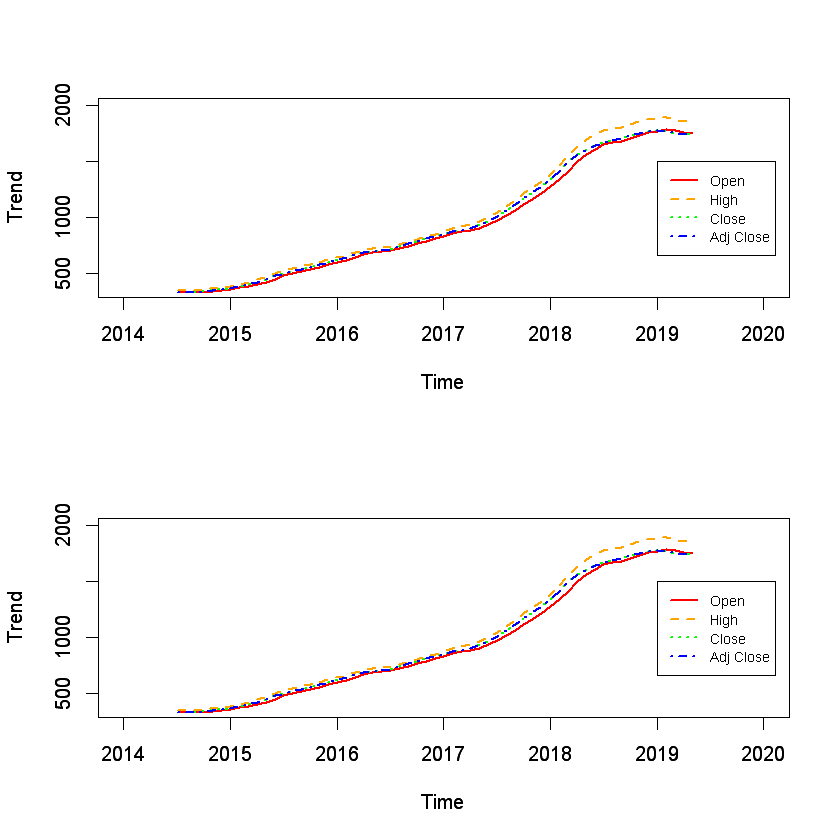

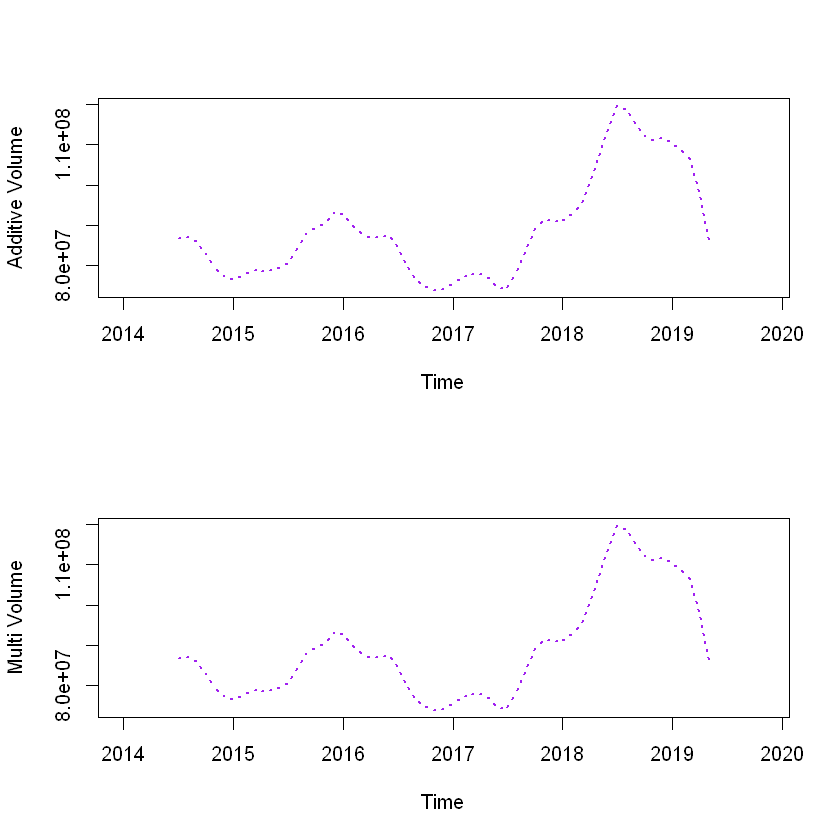

In [11]:
# Trend 를 이용하여 자료를 분석하고 결과를 비교한다.

layout(mat=matrix(c(1, 2), nrow=2, byrow = TRUE))

plot(AMZN.add.Open.ts$trend
     , col='red'
     , lty=1
     , lwd=2
     , xlim=range(2014, 2020)
     , ylim=range(350,2000)
     , ylab='Trend') ; par(new=TRUE)

plot(AMZN.add.High.ts$trend, col='orange', lty=2, lwd=2, xlim=range(2014, 2020), ylim=range(350,2000), ylab='Trend') ; par(new=TRUE)
plot(AMZN.add.Close.ts$trend, col='green', lty=3, lwd=2, xlim=range(2014, 2020), ylim=range(350,2000), ylab='Trend') ; par(new=TRUE)
plot(AMZN.add.AdjClose.ts$trend, col='blue', lty=4, lwd=2, xlim=range(2014, 2020), ylim=range(350,2000), ylab='Trend')

legend(2019, 1500, legend=c("Open", "High", "Close", "Adj Close"),
       col=c("red", "orange", "green", "blue"), lty=c(1,2,3,4), lwd=2, cex=0.7)

plot(AMZN.mul.Open.ts$trend, col='red', lty=1, lwd=2, xlim=range(2014, 2020), ylim=range(350,2000), ylab='Trend') ; par(new=TRUE)
plot(AMZN.mul.High.ts$trend, col='orange', lty=2, lwd=2, xlim=range(2014, 2020), ylim=range(350,2000), ylab='Trend') ; par(new=TRUE)
plot(AMZN.mul.Close.ts$trend, col='green', lty=3, lwd=2, xlim=range(2014, 2020), ylim=range(350,2000), ylab='Trend') ; par(new=TRUE)
plot(AMZN.mul.AdjClose.ts$trend, col='blue', lty=4, lwd=2, xlim=range(2014, 2020), ylim=range(350,2000), ylab='Trend')

legend(2019, 1500, legend=c("Open", "High", "Close", "Adj Close"),
       col=c("red", "orange", "green", "blue"), lty=c(1,2,3,4), lwd=2, cex=0.7)

layout(mat=matrix(c(1, 2), nrow=2, byrow = TRUE))

plot(AMZN.add.Volume.ts$trend, col='purple', lty=3, lwd=2, ylab='Additive Volume')
plot(AMZN.mul.Volume.ts$trend, col='purple', lty=3, lwd=2, ylab='Multi Volume')

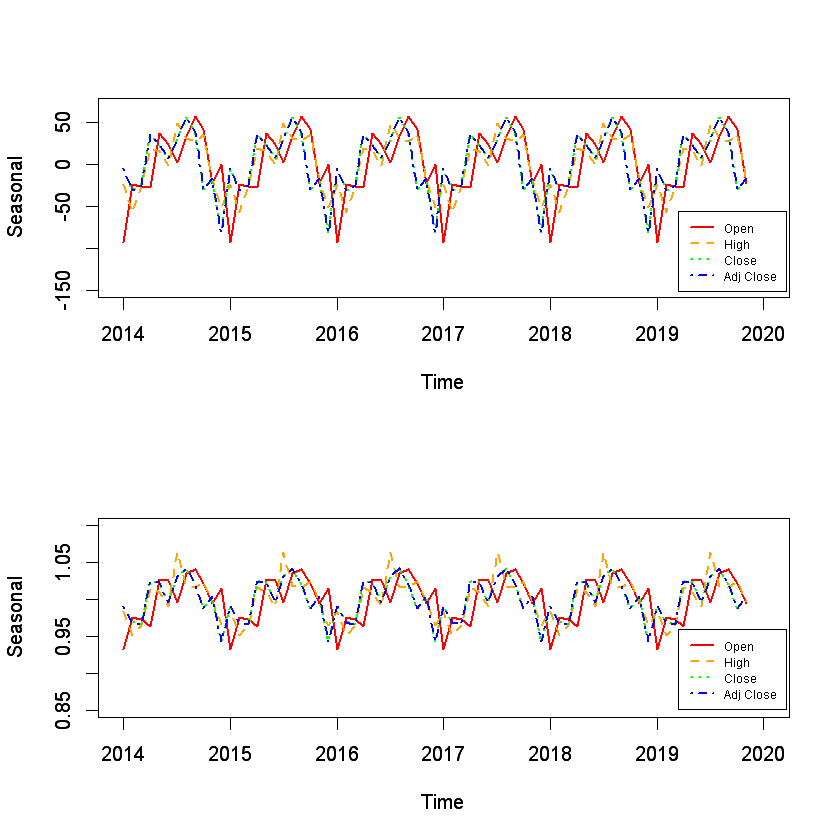

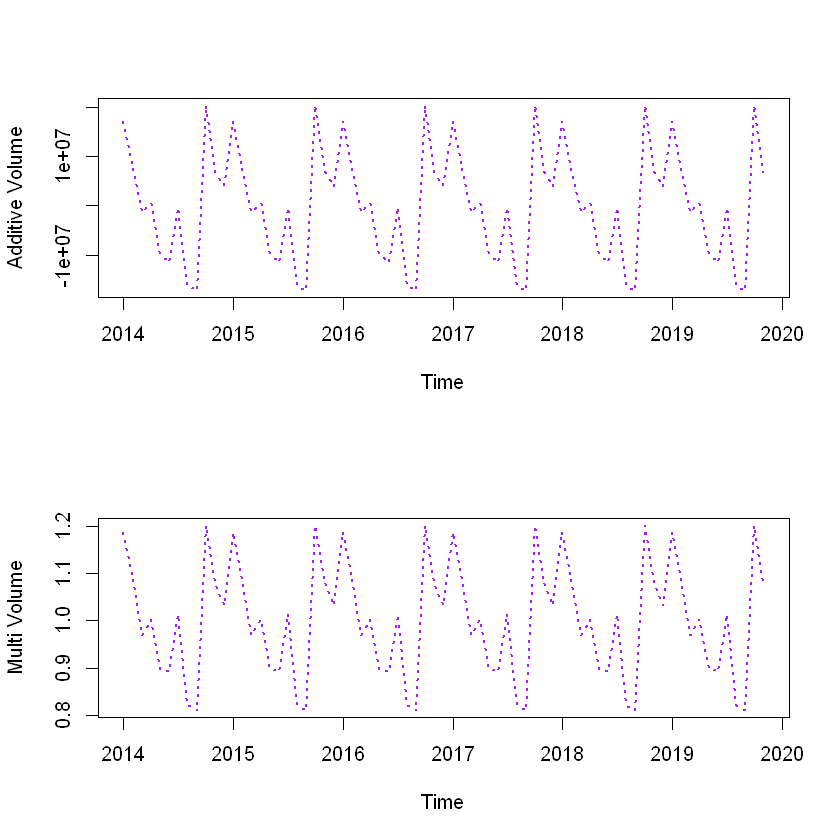

In [5]:
# Seasonal 을 이용하여 자료를 분석하고 결과를 비교한다.

layout(mat=matrix(c(1, 2), nrow=2, byrow = TRUE))

plot(AMZN.add.Open.ts$seasonal
     , col='red'
     , lty=1
     , lwd=2
     , xlim=range(2014, 2020)
     , ylim=range(-150,70)
     , ylab='Seasonal') ; par(new=TRUE)

plot(AMZN.add.High.ts$seasonal, col='orange', lty=2, lwd=2, xlim=range(2014, 2020), ylim=range(-150,70), ylab='Seasonal') ; par(new=TRUE)
plot(AMZN.add.Close.ts$seasonal, col='green', lty=3, lwd=2, xlim=range(2014, 2020), ylim=range(-150,70), ylab='Seasonal') ; par(new=TRUE)
plot(AMZN.add.AdjClose.ts$seasonal, col='blue', lty=4, lwd=2, xlim=range(2014, 2020), ylim=range(-150,70), ylab='Seasonal')

legend(2019.2, -56, legend=c("Open", "High", "Close", "Adj Close"),
       col=c("red", "orange", "green", "blue"), lty=c(1,2,3,4), lwd=2, cex=0.6)

plot(AMZN.mul.Open.ts$seasonal, col='red', lty=1, lwd=2, xlim=range(2014, 2020), ylim=range(0.85,1.1), ylab='Seasonal') ; par(new=TRUE)
plot(AMZN.mul.High.ts$seasonal, col='orange', lty=2, lwd=2, xlim=range(2014, 2020), ylim=range(0.85,1.1), ylab='Seasonal') ; par(new=TRUE)
plot(AMZN.mul.Close.ts$seasonal, col='green', lty=3, lwd=2, xlim=range(2014, 2020), ylim=range(0.85,1.1), ylab='Seasonal') ; par(new=TRUE)
plot(AMZN.mul.AdjClose.ts$seasonal, col='blue', lty=4, lwd=2, xlim=range(2014, 2020), ylim=range(0.85,1.1), ylab='Seasonal')

legend(2019.2, 0.96, legend=c("Open", "High", "Close", "Adj Close"),
       col=c("red", "orange", "green", "blue"), lty=c(1,2,3,4), lwd=2, cex=0.6)

layout(mat=matrix(c(1, 2), nrow=2, byrow = TRUE))

plot(AMZN.add.Volume.ts$seasonal, col='purple', lty=3, lwd=2, ylab='Additive Volume')
plot(AMZN.mul.Volume.ts$seasonal, col='purple', lty=3, lwd=2, ylab='Multi Volume')

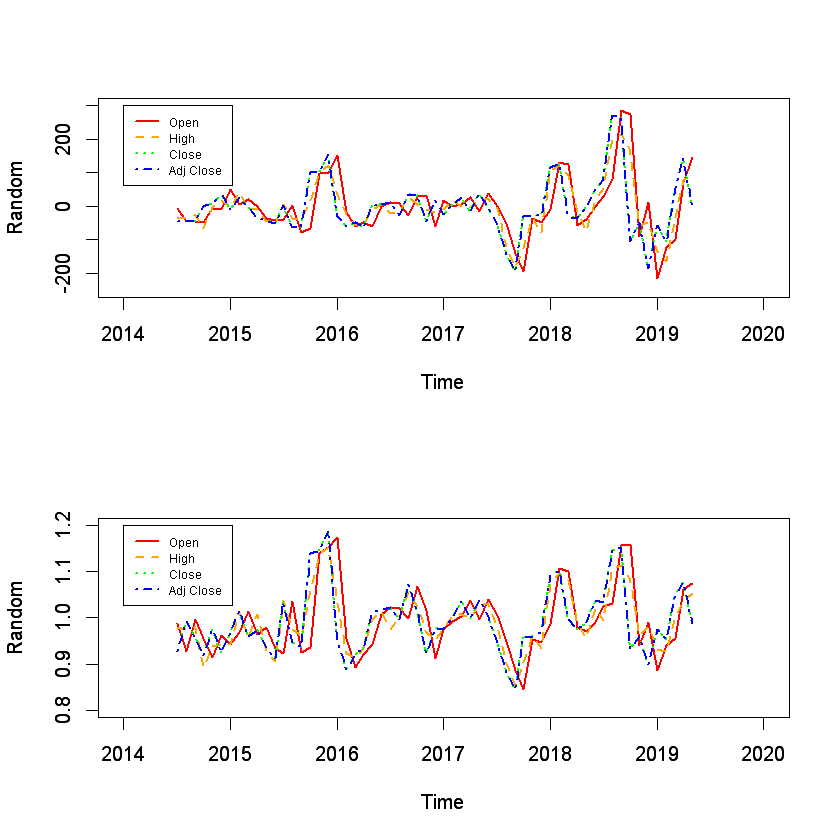

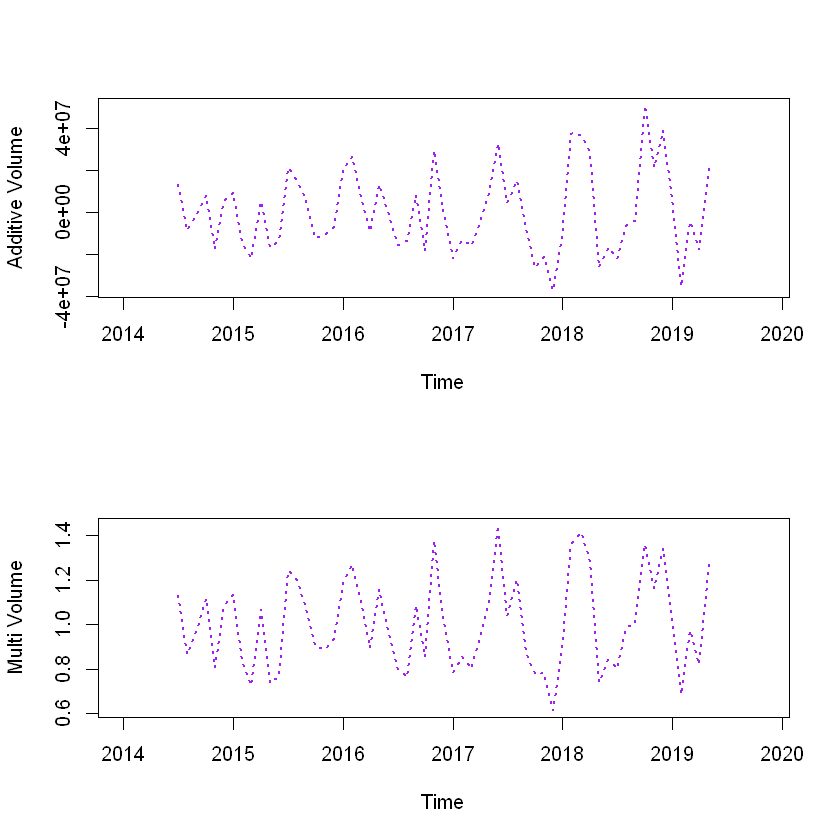

In [6]:
# Random 을 이용하여 자료를 분석하고 결과를 비교한다.

layout(mat=matrix(c(1, 2), nrow=2, byrow = TRUE))

plot(AMZN.add.Open.ts$random
     , col='red'
     , lty=1
     , lwd=2
     , xlim=range(2014, 2020)
     , ylim=range(-250,300)
     , ylab='Random') ; par(new=TRUE)

plot(AMZN.add.High.ts$random, col='orange', lty=2, lwd=2, xlim=range(2014, 2020), ylim=range(-250,300), ylab='Random') ; par(new=TRUE)
plot(AMZN.add.Close.ts$random, col='green', lty=3, lwd=2, xlim=range(2014, 2020), ylim=range(-250,300), ylab='Random') ; par(new=TRUE)
plot(AMZN.add.AdjClose.ts$random, col='blue', lty=4, lwd=2, xlim=range(2014, 2020), ylim=range(-250,300), ylab='Random')

legend(2014, 300, legend=c("Open", "High", "Close", "Adj Close"),
       col=c("red", "orange", "green", "blue"), lty=c(1,2,3,4), lwd=2, cex=0.6)

plot(AMZN.mul.Open.ts$random, col='red', lty=1, lwd=2, xlim=range(2014, 2020), ylim=range(0.8,1.2), ylab='Random') ; par(new=TRUE)
plot(AMZN.mul.High.ts$random, col='orange', lty=2, lwd=2, xlim=range(2014, 2020), ylim=range(0.8,1.2), ylab='Random') ; par(new=TRUE)
plot(AMZN.mul.Close.ts$random, col='green', lty=3, lwd=2, xlim=range(2014, 2020), ylim=range(0.8,1.2), ylab='Random') ; par(new=TRUE)
plot(AMZN.mul.AdjClose.ts$random, col='blue', lty=4, lwd=2, xlim=range(2014, 2020), ylim=range(0.8,1.2), ylab='Random')

legend(2014, 1.2, legend=c("Open", "High", "Close", "Adj Close"),
       col=c("red", "orange", "green", "blue"), lty=c(1,2,3,4), lwd=2, cex=0.6)

layout(mat=matrix(c(1, 2), nrow=2, byrow = TRUE))

plot(AMZN.add.Volume.ts$random, col='purple', lty=3, lwd=2, ylab='Additive Volume')
plot(AMZN.mul.Volume.ts$random, col='purple', lty=3, lwd=2, ylab='Multi Volume')

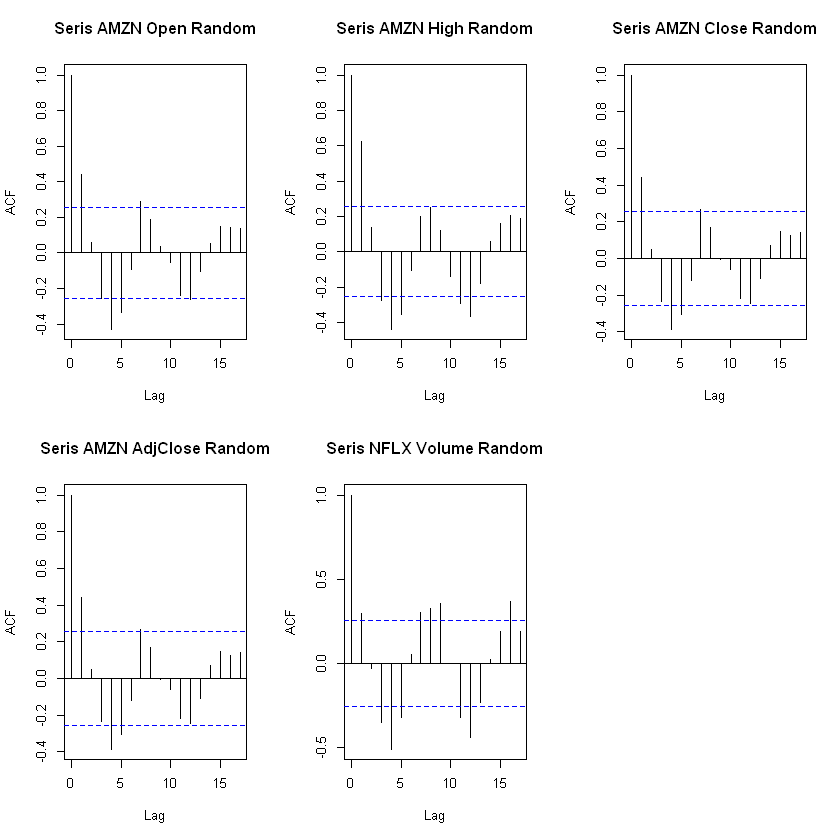

In [7]:
# (b) R의 acf함수를 이용, (a)의 랜덤요소에 대한 자기상관계수를 그리고 이를 해석한다.
layout(mat=matrix(c(1, 2, 3,
                    4, 5, 6), nrow=2, byrow = TRUE))

acf(AMZN.add.Open.ts$random[7:65], main="Seris AMZN Open Random")
acf(AMZN.add.High.ts$random[7:65], main="Seris AMZN High Random")
acf(AMZN.add.Close.ts$random[7:65], main="Seris AMZN Close Random")
acf(AMZN.add.AdjClose.ts$random[7:65], main="Seris AMZN AdjClose Random")
acf(AMZN.add.Volume.ts$random[7:65], main="Seris NFLX Volume Random")

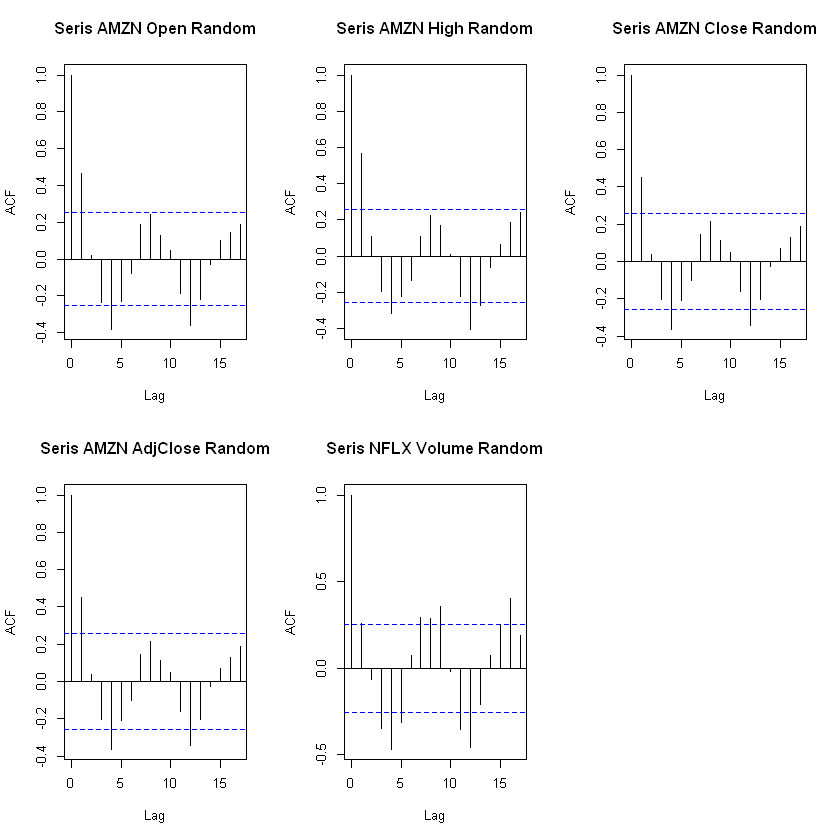

In [8]:
layout(mat=matrix(c(1, 2, 3,
                    4, 5, 6), nrow=2, byrow = TRUE))

acf(AMZN.mul.Open.ts$random[7:65], main="Seris AMZN Open Random")
acf(AMZN.mul.High.ts$random[7:65], main="Seris AMZN High Random")
acf(AMZN.mul.Close.ts$random[7:65], main="Seris AMZN Close Random")
acf(AMZN.mul.AdjClose.ts$random[7:65], main="Seris AMZN AdjClose Random")
acf(AMZN.mul.Volume.ts$random[7:65], main="Seris NFLX Volume Random")